# Project 5 - Optimization Exercise

## finding N maximally distant points on a sphere or unit sphere

In [1]:
import tensorflow as tf
assert tf.__version__ >= "2.0"

import numpy as np
import matplotlib.pyplot as plt
import random

%matplotlib qt

In [2]:
# set up number of dimensions (could be 2 or 3 for visualization)
NUM_DIMS = 2

# set up number of points that will be on unit sphere
NUM_PTS = 4

In [3]:
# function to calculate loss term that penalizes points for not being on unit sphere

def sphere_term(tf_pts):           #tf_points will be defined later. It's a tensorflow variable. Basically an array of points.
    zr = np.zeros([NUM_DIMS])      #make the Origin. We want all points to be 1 unit away from that. (on the unit sphere)
    a = 0                          #our distance from the origin. To be calculted in the next few lines.
    for n in range(NUM_PTS):
        a += tf.abs(tf.norm(tf_pts[n,:]-zr)-1)
        
        #Basically takes a vector difference of the point and origin, than computes the norm (magniture)
        #before taking the absolute value. The norm should be 1, so we subtract 1 to try and get 0, which
        #should be the lowest possible value to get out of this function.
        
    return a

In [4]:
#takes a point input, which is what the function will attempt to cause 1 point to "gravitate" towards. The cost rises as the
#first point in the input list gets further from the chosen point. (I'm using Euclidian distance for this)

def point_term(tf_pts, point):
    a = 0
    value_array = tf_pts.numpy()#convert to a numpy array for ease of slicing and striding. Inefficiant? Yes. Effective though.
    counter = 0
    
    #iterate over each vector value, find the difference between them, and square the result.
    
    for i in range(0, len(value_array[0])):
            counter += (value_array[0][i] - point[i])**2
    euclidian_distance = counter**1/2
    return euclidian_distance    

In [5]:
#testing and gaining intuition for the "norm" of different things.
origin = np.array([0.0, 0.0])
inside = np.array([0.5, 0.6])
on = np.array([1.0, 0.0])
outside = np.array([1.5, 2.0])
big_boi = [[3.0, 2.0], [0.3, 0.2], [1.0, 0.0]]

on_norm = tf.norm(on)
print("on_norm is: " + str(on_norm))

on_minus_origin = (on - origin)
print("on_minus_origin is: " + str(on_minus_origin))

origin_minus_on = (origin - on)
print("origin_minus_on is: " + str(origin_minus_on))

origin_minus_on_norm = tf.norm(origin_minus_on)
print("origin_minus_on_norm is: " + str(origin_minus_on_norm))

inside_norm = tf.norm(inside)
print("inside_norm is: " + str(inside_norm))

big_boi_norm = tf.norm(big_boi)
print("big_boi_norm is: " + str(big_boi_norm))

#OK if we can get norms that are less than 1 than our function might converge on something wrong. TODO

on_norm is: tf.Tensor(1.0, shape=(), dtype=float64)
on_minus_origin is: [1. 0.]
origin_minus_on is: [-1.  0.]
origin_minus_on_norm is: tf.Tensor(1.0, shape=(), dtype=float64)
inside_norm is: tf.Tensor(0.7810249675906654, shape=(), dtype=float64)
big_boi_norm is: tf.Tensor(3.7589893, shape=(), dtype=float32)


In [6]:
# function to calculate loss term that penalizes points for not being on unit sphere
def repel_term(tf_pts):
    a = 0
    for n in range(NUM_PTS):
        for m in range(n):
            a += 1.0/(tf.norm(tf_pts[n,:]-tf_pts[m,:])+1e-20)
    return a

In [7]:
# combined loss function with term weight constants
alpha = 10
beta = 10
gamma = 10

close_point = [0, 1] #the point to try and get the first point in tf_pts to gravitate to. Can be any dimensionality.

# `loss` is a callable that takes no argument and returns the value to minimize.
# "lambda" is a tensorflow compatibility step for the loss callable.

loss = lambda: alpha*sphere_term(tf_pts) + beta*repel_term(tf_pts) + gamma*point_term(tf_pts, close_point)

In [8]:
# Create an optimizer with the desired parameters.
# opt = tf.keras.optimizers.SGD(learning_rate=0.00001)
opt = tf.keras.optimizers.Nadam()#instantiate an instance of the nadam optimizer and call it "opt"

In [9]:
#create random points in range 0-1.0 as numpy array and cast to TF variable
tf_pts = tf.Variable(np.random.rand(NUM_PTS,NUM_DIMS))

In [10]:
# calling optimization in tensorflow
# set up number of iterations that the optimization will run
NUM_ITERS = 10000
sphere_terms = []#make two lists for holding the cost information as we go along. We'll use it later.
repel_terms = []
point_terms = []
for n in range(NUM_ITERS):
    sphere_terms.append(alpha*sphere_term(tf_pts))
    repel_terms.append(beta*repel_term(tf_pts))   
    point_terms.append(gamma*point_term(tf_pts, close_point))
    if n%100 == 0:
        print('iteration #: ',n)#print every hundredth iteration.
        print(alpha*sphere_term(tf_pts))
        print(beta*repel_term(tf_pts))
    opt.minimize(loss, var_list=[tf_pts])

iteration #:  0
tf.Tensor(15.27567670841269, shape=(), dtype=float64)
tf.Tensor(575.5460770910051, shape=(), dtype=float64)
iteration #:  100
tf.Tensor(14.446424962690806, shape=(), dtype=float64)
tf.Tensor(230.87448657140447, shape=(), dtype=float64)
iteration #:  200
tf.Tensor(15.78028639172527, shape=(), dtype=float64)
tf.Tensor(166.5712950459755, shape=(), dtype=float64)
iteration #:  300
tf.Tensor(16.870866211250863, shape=(), dtype=float64)
tf.Tensor(135.6670407035797, shape=(), dtype=float64)
iteration #:  400
tf.Tensor(17.74831901083235, shape=(), dtype=float64)
tf.Tensor(117.60991121479067, shape=(), dtype=float64)
iteration #:  500
tf.Tensor(18.46978155513974, shape=(), dtype=float64)
tf.Tensor(105.35582222630543, shape=(), dtype=float64)
iteration #:  600
tf.Tensor(19.06549377870916, shape=(), dtype=float64)
tf.Tensor(96.2480750368966, shape=(), dtype=float64)
iteration #:  700
tf.Tensor(19.55016012525972, shape=(), dtype=float64)
tf.Tensor(89.07638141266037, shape=(), dtype

iteration #:  6500
tf.Tensor(5.4739101314631355, shape=(), dtype=float64)
tf.Tensor(35.784839877980346, shape=(), dtype=float64)
iteration #:  6600
tf.Tensor(5.144389090483179, shape=(), dtype=float64)
tf.Tensor(35.891413090232504, shape=(), dtype=float64)
iteration #:  6700
tf.Tensor(4.811053243033301, shape=(), dtype=float64)
tf.Tensor(36.00453857183471, shape=(), dtype=float64)
iteration #:  6800
tf.Tensor(4.476528795601804, shape=(), dtype=float64)
tf.Tensor(36.12246419519937, shape=(), dtype=float64)
iteration #:  6900
tf.Tensor(4.1340199222506735, shape=(), dtype=float64)
tf.Tensor(36.25179548236189, shape=(), dtype=float64)
iteration #:  7000
tf.Tensor(3.802685531648129, shape=(), dtype=float64)
tf.Tensor(36.37659786072242, shape=(), dtype=float64)
iteration #:  7100
tf.Tensor(3.467660829014161, shape=(), dtype=float64)
tf.Tensor(36.51117619552736, shape=(), dtype=float64)
iteration #:  7200
tf.Tensor(3.127440529176387, shape=(), dtype=float64)
tf.Tensor(36.65967036240032, shape

In [138]:
%matplotlib inline
#keep the popup window from being a thing.

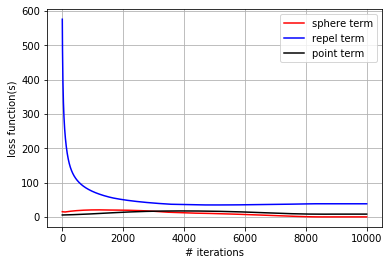

In [11]:
# plotting loss curves
plt.figure()
s_line, = plt.plot(sphere_terms,'r')
r_line, = plt.plot(repel_terms,'b')
p_line, = plt.plot(point_terms,'k')
plt.xlabel('# iterations')
plt.ylabel('loss function(s)')
plt.grid()
plt.legend((s_line,r_line, p_line),('sphere term','repel term', 'point term'))
plt.show()

In [12]:
tf_array = tf_pts.numpy()#gotta convert it to be useable. tf_pts is a special tensorflow variable.
print("the data type of tf_array is: " + str(type(tf_array)))
print("")

print("tf_array is:")
print(tf_array)
print("")

# check if distance of pts from origin is 1
print("the norm is....." + str(np.linalg.norm(tf_array,axis = 1)))


the data type of tf_array is: <class 'numpy.ndarray'>

tf_array is:
[[ 0.98535286  0.18659521]
 [-0.18524838  0.9855357 ]
 [-0.983537   -0.18504064]
 [ 0.18714326 -0.9828854 ]]

the norm is.....[1.00286491 1.00279489 1.00079222 1.000543  ]


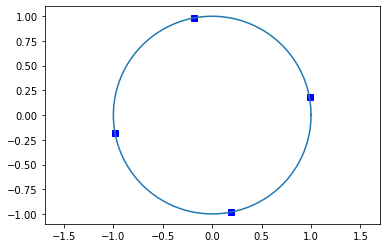

In [13]:
# 2-D Plotting with unit circle
if NUM_DIMS == 2:
    # 2-D Plotting
    fig, axs = plt.subplots(1,1)
    axs.plot(tf_pts[:,0],tf_pts[:,1],'bs')
    axs.axis('equal')
    angles = np.linspace(0, 2 * np.pi, 100)
    axs.plot(np.cos(angles),np.sin(angles))

In [164]:
# 3-D Plotting with unit sphere
if NUM_DIMS == 3:
    a = tf_pts
    import matplotlib as mpl
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    xp = a[:,0]
    yp = a[:,1]
    zp = a[:,2]
    ax.plot(xp, yp, zp, 'bs')
    
    from mpl_toolkits.mplot3d import Axes3D
    import matplotlib.pyplot as plt
    import numpy as np


    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Make data
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = np.outer(np.cos(u), np.sin(v))
    y = np.outer(np.sin(u), np.sin(v))
    z = np.outer(np.ones(np.size(u)), np.cos(v))

    # Plot the surface
    ax.plot_surface(x, y, z, color='b',alpha = 0.2)
    ax.scatter(xp, yp, zp, 'bs')

    plt.show()